In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from itertools import chain

In [266]:
# Открываем файл для чтения
with open('individ.txt', 'r') as file:
    all_lists = []
    for line in file:
        numbers = re.findall(r'-?\d+\.?\d*', line)
        numbers = [float(num) for num in numbers]
        filtered_numbers = [num for num in numbers if 13 <= num <= 17]
        all_lists.append(filtered_numbers)
numbers = list(chain.from_iterable(all_lists))
E = []
for i in range(len(numbers)):
    en = numbers[i]/(48+84+4+4)
    E.append(en)
    # Выводим результат


df = pd.DataFrame({'Энергия структуры':numbers,'Энергия структуры на атом':E})

In [268]:
df

,Энергия структуры,Энергия структуры на атом
0,15.561,0.111150
1,16.418,0.117271
2,16.474,0.117671
3,15.914,0.113671
4,16.200,0.115714
...,...,...
217,14.947,0.106764
218,15.823,0.113021
219,15.337,0.109550
220,16.361,0.116864


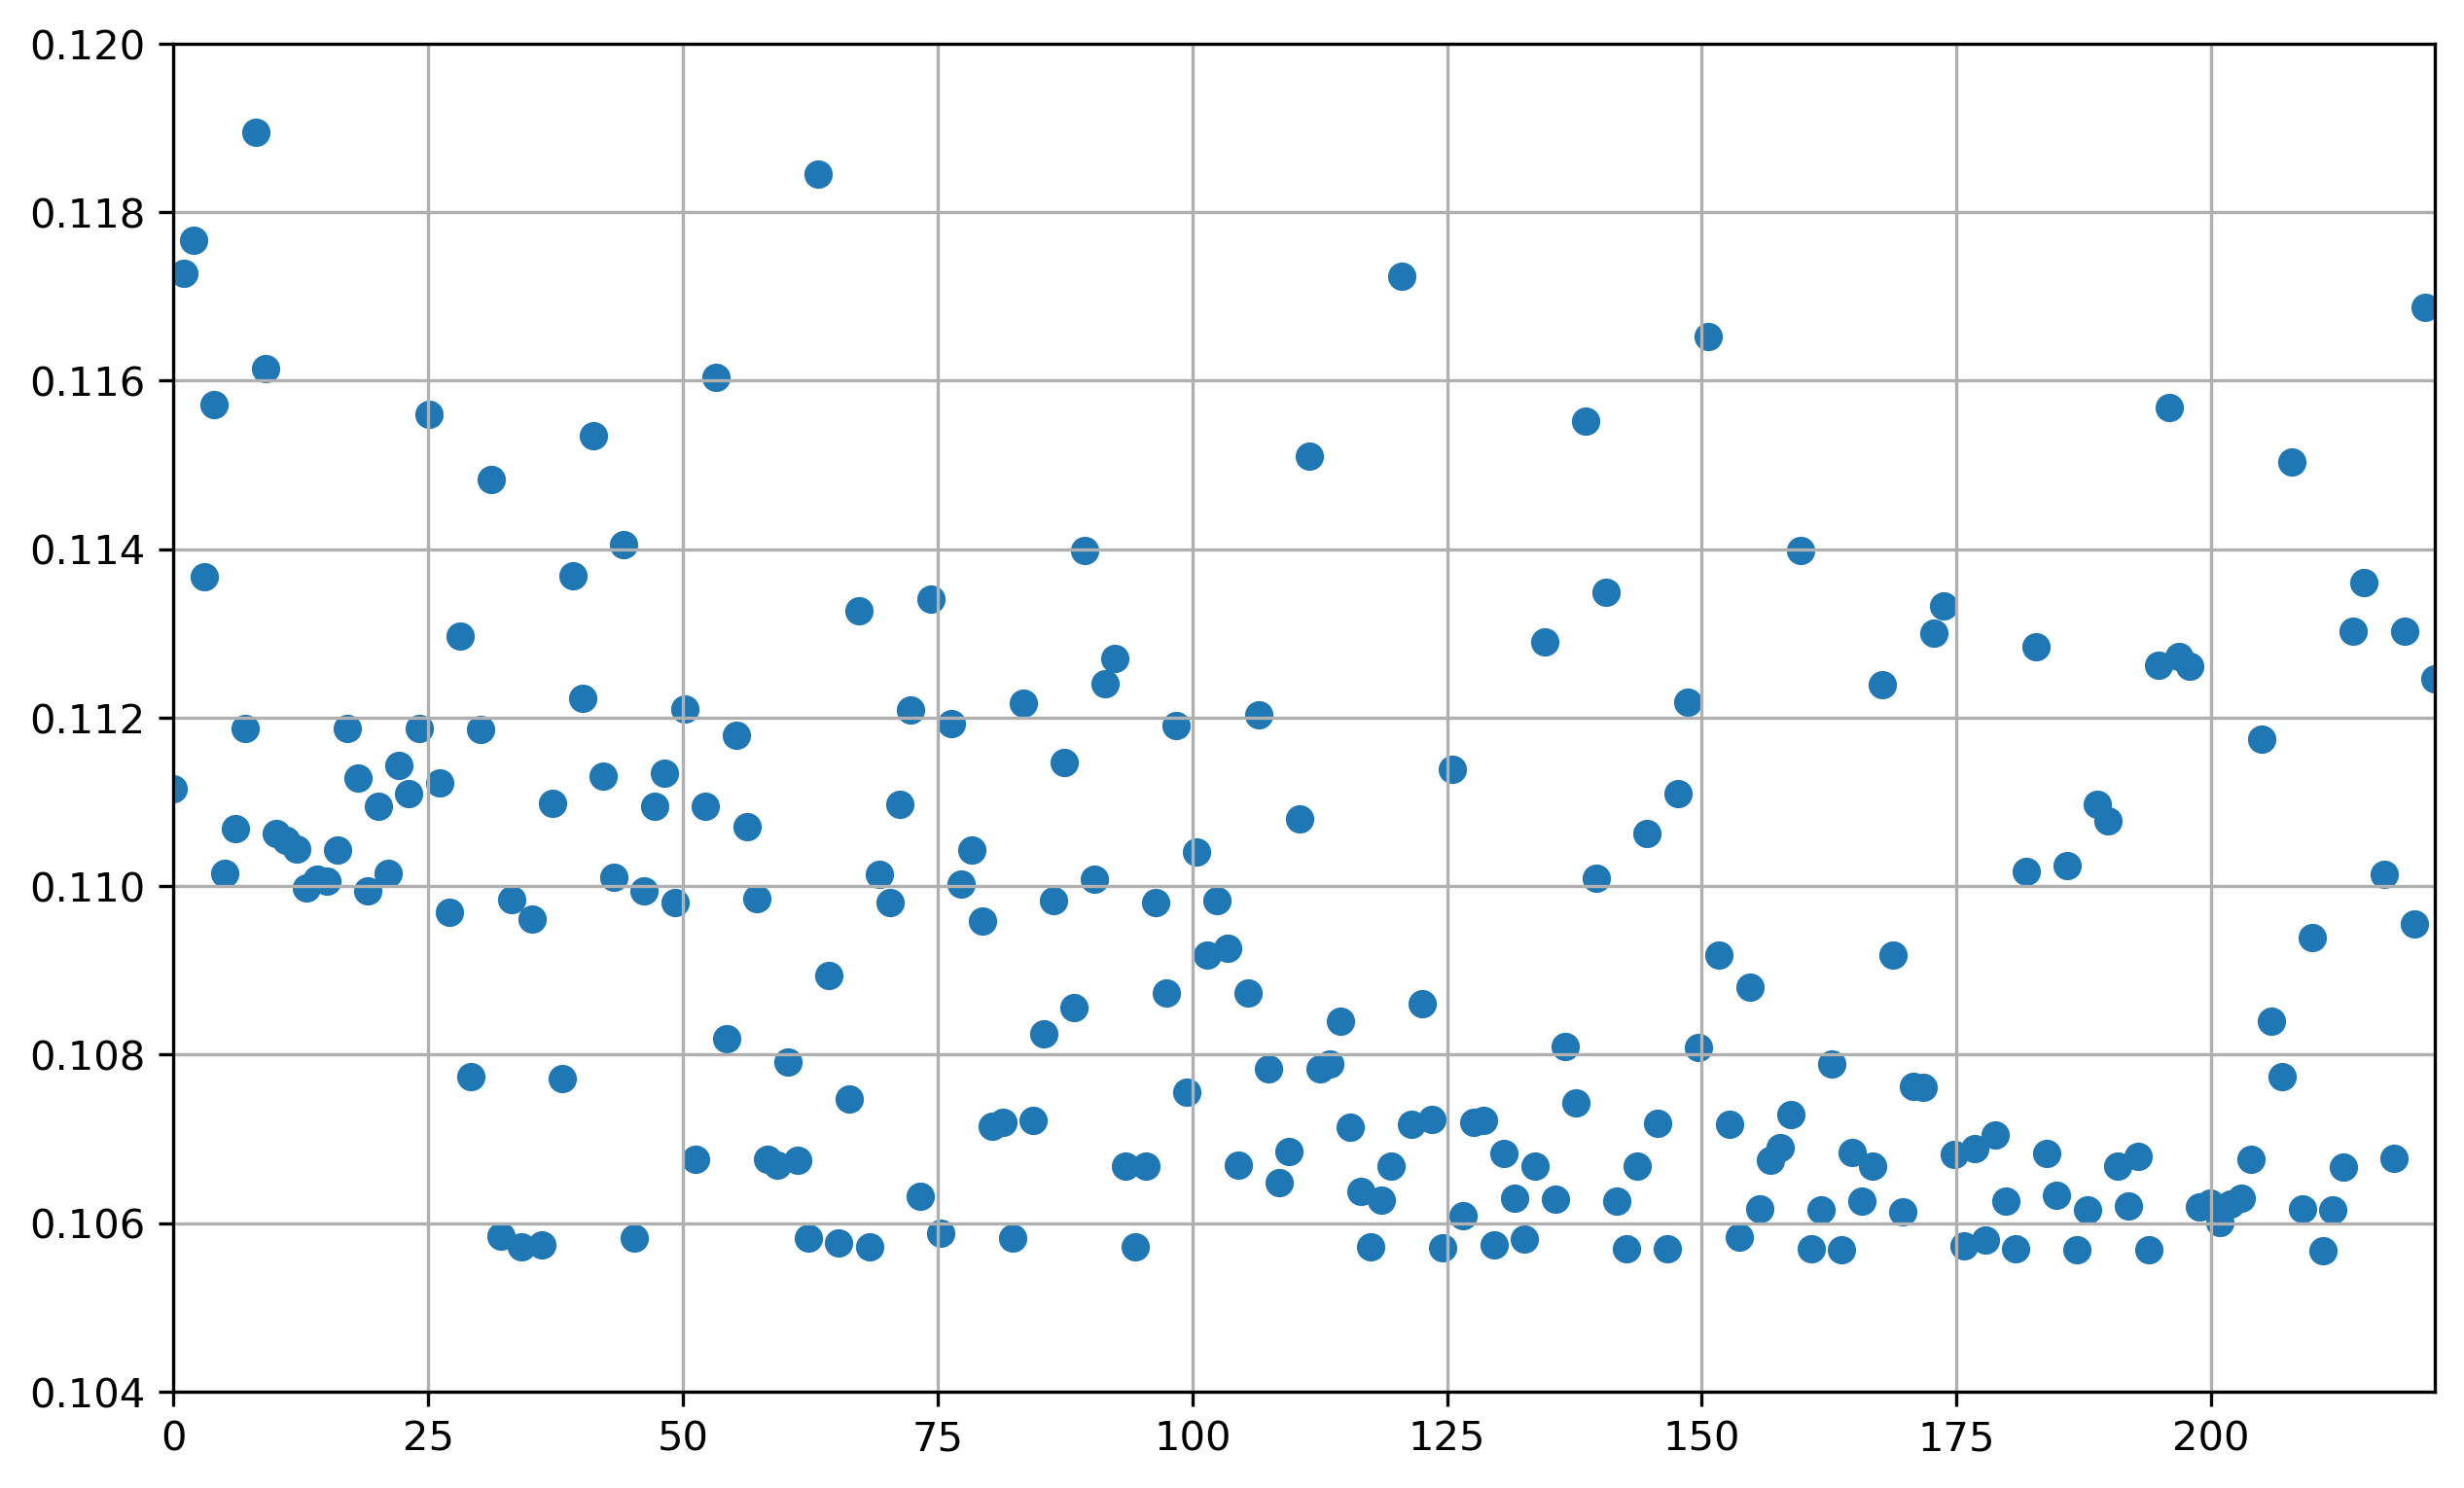

In [298]:
plt.figure(figsize=(10, 6), dpi=300)
plt.grid()
plt.xlim(0, 222)
plt.ylim(0.104, 0.12)
x = np.linspace(0, 222, 222)
plt.scatter(x, df['Энергия структуры на атом'])

In [322]:
#Van der Waals
RC = 1.70
RN = 1.55
RO = 1.52 
RH = 1.10
NC = 48 
NH = 84
NN = 4
NO = 4
VolumeMol = (4/3)*3.1415926*(RC**3*NC + RN**3*NN + NO*RO**3 + RH**3*NH)
print(VolumeMol/1230)

1.2824193225233418


[11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.
 18.5 19.  19.5 20.  20.5]
y = -7.444360547513478e-06x  0.0010772087004546167
ready
ready
ready


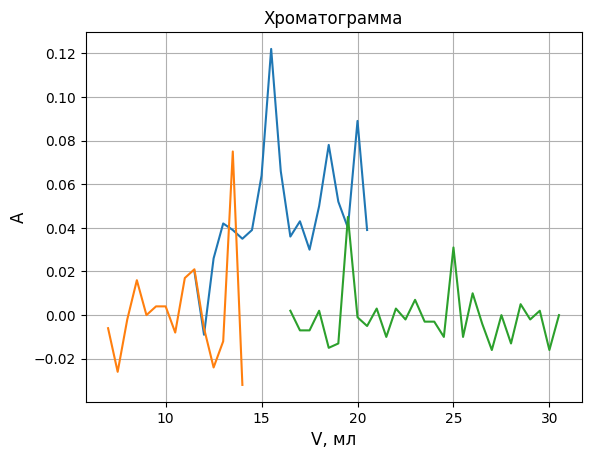

In [78]:
import numpy as np
v = np.arange(0.5,10,0.5)+11
abs= np.array([0.02, -0.009,0.026, 0.042, 0.039, 0.035, 0.039, 0.064, 0.122, 0.066, 0.036, 0.043, 0.03, 0.05, 0.078, 0.052, 0.04, 0.089, 0.039  ])
print(v)

v2 = np.arange(0.5,8,0.5)+6.5
abs2 = np.array([-0.006, -0.026, -0.002, 0.016, 0, 0.004, 0.004, -0.008, 0.017, 0.021, -0.006, -0.024, -0.012, 0.075, -0.032])
#plt.plot(v, abs)

v3 = np.arange(0.5,15, 0.5)+16
abs3 = np.array([-0.02, -0.029, -0.029, -0.02, -0.037, -0.035, 0.023, -0.023, -0.027, -0.019, -0.032, -0.019, -0.024, -0.015, -0.005
                -0.02, -0.025, -0.032, 0.009, -0.032, -0.012, -0.026, -0.038, -0.022, -0.035,-0.017, -0.024, -0.02, -0.038, -0.022])
abs3_3= abs3+0.022
inter = np.polyfit(v, abs, 9)
print(f'y = {inter[0]}x  {inter[1]}')
x_fit = np.linspace(
            v.min(),
            v.max(),
            100
        )
y_fit = np.polyval(inter, x_fit)
#plt.plot(x_fit, y_fit, label='Calibration Line ')
def plot_graf(x,y):
    plt.xlabel("V, мл", fontsize=12)
    plt.ylabel("A", fontsize=12)
    plt.plot(x, y)
    print('ready')
plot_graf(v,abs)
plot_graf(v2, abs2)
plot_graf(v3, abs3_3)
plt.title("Хроматограмма")
plt.grid()

Исходные данные:
V = [14.  19.5]
M = [68500 14300]
lg M = [4.83569057 4.15533604]

Результаты регрессии:
Наклон (a) = -0.1237
Intercept (b) = 6.5675
Уравнение: lg M = -0.1237V + 6.5675

Прогноз для V=15.5: lg M = 4.6501
Масса белка 44682.692488711495кДа


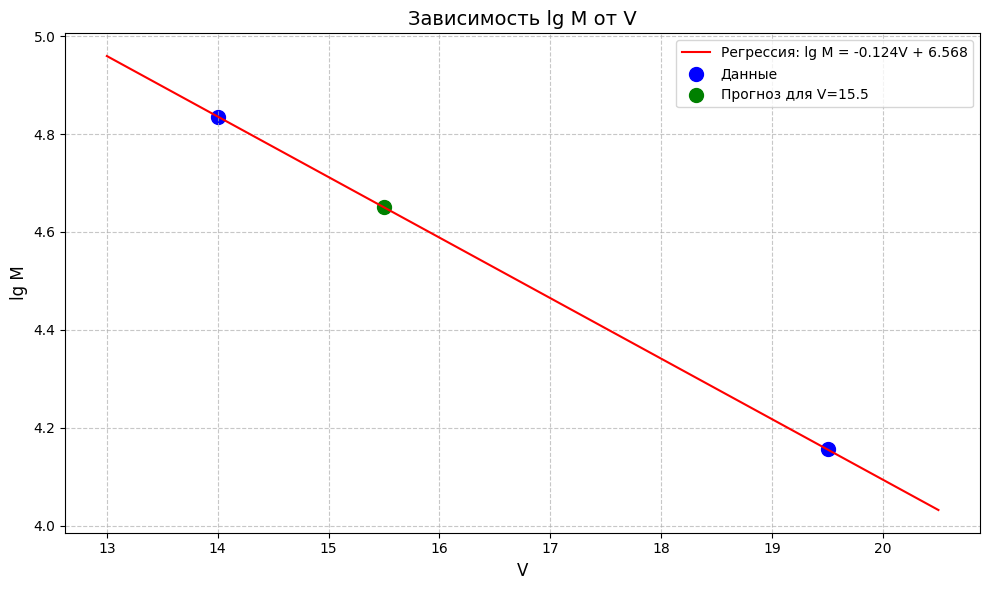

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
V = np.array([7.5 + 6.5, 7*0.5 + 16])  # Вектор V = [14.0, 19.5]
M = np.array([68500, 14300])            # Вектор M
lg = np.log10(M)                        # Десятичный логарифм M

# Линейная регрессия
coefficients = np.polyfit(V, lg, 1)     # Коэффициенты [a, b]
a, b = coefficients                     # a - наклон, b - intercept

# Генерация точек для линии регрессии
x = np.linspace(min(V)-1, max(V)+1, 100)  # Диапазон по V
y = a * x + b                            # Линейная зависимость

# Точка для предсказания (9*0.5+10 = 14.5)
V_new = 11*0.5 + 10
lg_pred = a * V_new + b

# Построение графика
plt.figure(figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.7)

# Правильный порядок осей: V по X, lg M по Y
plt.plot(x, y, 'r-', label=f'Регрессия: lg M = {a:.3f}V + {b:.3f}')
plt.scatter(V, lg, s=100, c='blue', label='Данные')
plt.scatter(V_new, lg_pred, s=100, c='green', label=f'Прогноз для V={V_new}')

# Настройки графика
plt.xlabel('V', fontsize=12)
plt.ylabel('lg M', fontsize=12)
plt.title('Зависимость lg M от V', fontsize=14)
plt.legend(fontsize=10)

# Вывод результатов
print("Исходные данные:")
print(f"V = {V}")
print(f"M = {M}")
print(f"lg M = {lg}")
print("\nРезультаты регрессии:")
print(f"Наклон (a) = {a:.4f}")
print(f"Intercept (b) = {b:.4f}")
print(f"Уравнение: lg M = {a:.4f}V + {b:.4f}")
print(f"\nПрогноз для V={V_new}: lg M = {lg_pred:.4f}")
print(f"Масса белка {10**(lg_pred)}кДа")
plt.tight_layout()
plt.show()

In [219]:
data =pd.DataFrame({'Температура':[500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610], 'Давление':[23, 35, 52, 76, 110, 156, 220, 305, 418, 566, 759, 1007]})

In [220]:

data['Температура, K'] = data['Температура']+273


In [221]:
data['Ka'] = (data['Давление'] / 760)
data['ln(Ka)'] = np.log(data['Ka'])
data['1/T'] = 1 / data['Температура, K']
inter = np.polyfit(data['1/T'], data['ln(Ka)'], 1)
a , b = inter
x = np.linspace(min(data['1/T']), max(data['1/T']), 1000)
y = np.polyval(inter, x)
print(inter)
sum(data['1/T'])/len(data['1/T']) 

[-23413.88056952     26.84011149]


0.0012098352473569713

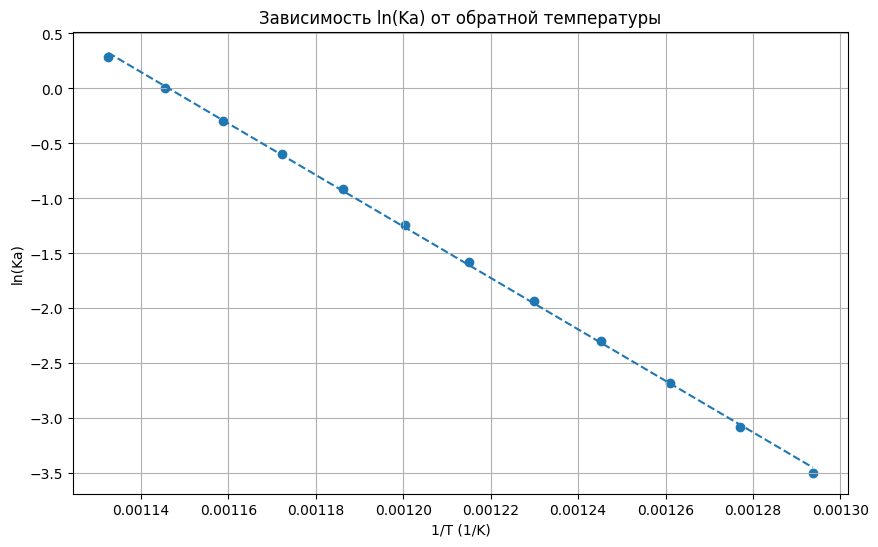

Cредняя интервальная температура 0.0012077294685990338:T K и
Наклон (a) = -23413.8806
Intercept (b) = 26.8401
Уравнение: ln(Ka) = -23413.8806 1/T + 26.8401
Энтальпия реакции 194663.00305499582 Дж и Энтропия реакции 223.14868694082904 Дж/К
Энергия Гиббса 70815.4818028357Дж
Константа равновесия при среднем интервальном Т : -15.347060705774844 
Равновесное давление кислорода: 2.8824331390273418e-05


In [235]:
import matplotlib.pyplot as plt
import math 


plt.figure(figsize=(10, 6))
plt.plot(x, y, '--')
plt.scatter(data['1/T'], data['ln(Ka)'])
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(Ka)')
plt.title('Зависимость ln(Ka) от обратной температуры')
plt.grid(True)
plt.show()
T = sum(data['Температура, K'])/len(data['Температура, K'])
T_new = 1/T
gibbs = -a*8.314 - 555 * b*8.314
#Ka = math.exp(-gibbs/(8.314*555))
Ka =(-gibbs/(8.314*555))
ka = math.exp(Ka)
print(f'Cредняя интервальная температура {T_new}:T K и')
print(f"Наклон (a) = {a:.4f}")
print(f"Intercept (b) = {b:.4f}")
print(f"Уравнение: ln(Ka) = {a:.4f} 1/T + {b:.4f}")
print(f'Энтальпия реакции {-a*8.314} Дж и Энтропия реакции {b*8.314} Дж/К')
print(f'Энергия Гиббса {gibbs}Дж')
print(f'Константа равновесия при среднем интервальном Т : {Ka} ')
print(f'Равновесное давление кислорода: {ka*101325/760}')

In [223]:
data

,Температура,Давление,"Температура, K",Ka,ln(Ka),1/T
0,500,23,773,0.030263,-3.497824,0.001294
1,510,35,783,0.046053,-3.077970,0.001277
2,520,52,793,0.068421,-2.682075,0.001261
3,530,76,803,0.100000,-2.302585,0.001245
4,540,110,813,0.144737,-1.932838,0.001230
5,550,156,823,0.205263,-1.583462,0.001215
6,560,220,833,0.289474,-1.239691,0.001200
7,570,305,843,0.401316,-0.913007,0.001186
8,580,418,853,0.550000,-0.597837,0.001172
9,590,566,863,0.744737,-0.294724,0.001159


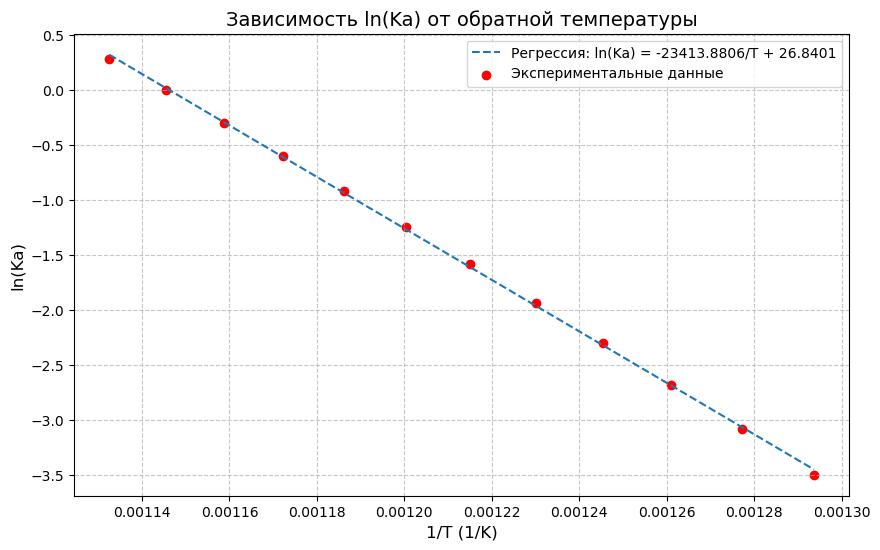

Параметры регрессии:
Наклон (a) = -23413.8806
Intercept (b) = 26.8401
Уравнение: ln(Ka) = -23413.8806/T + 26.8401

Термодинамические параметры при 555 K:
Энтальпия реакции (ΔH): 194663.00 Дж/моль
Энтропия реакции (ΔS): 223.15 Дж/(моль·K)
Энергия Гиббса (ΔG): 70815.48 Дж/моль

Константа равновесия (Ka): 2.3752e-01
Равновесное давление O2: 180.51 мм рт.ст.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

data = pd.DataFrame({
    'Температура': [500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610],
    'Давление': [23, 35, 52, 76, 110, 156, 220, 305, 418, 566, 759, 1007]
})

# Расчет параметров
data['Температура, K'] = data['Температура'] + 273
data['Ka'] = (data['Давление'] / 760)  # Переводим мм рт.ст. в атм
data['ln(Ka)'] = np.log(data['Ka'])
data['1/T'] = 1 / data['Температура, K']

# Линейная регрессия
coefficients = np.polyfit(data['1/T'], data['ln(Ka)'], 1)
a, b = coefficients

# График
x = np.linspace(min(data['1/T']), max(data['1/T']), 100)
y = np.polyval(coefficients, x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, '--', label=f'Регрессия: ln(Ka) = {a:.4f}/T + {b:.4f}')
plt.scatter(data['1/T'], data['ln(Ka)'], color='red', label='Экспериментальные данные')
plt.xlabel('1/T (1/K)', fontsize=12)
plt.ylabel('ln(Ka)', fontsize=12)
plt.title('Зависимость ln(Ka) от обратной температуры', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Термодинамические расчеты
target_T = 555  # Целевая температура для расчетов
delta_H = -a * 8.314  # Энтальпия реакции (Дж/моль)
delta_S = b * 8.314   # Энтропия реакции (Дж/(моль·K))
delta_G = delta_H - target_T * delta_S  # Энергия Гиббса (Дж/моль)

# Правильный расчет константы равновесия
Ka = math.exp(coefficients[0]/828  +coefficients[1])

# Расчет равновесного давления кислорода (в мм рт.ст.)
P_O2 = Ka * 760  # Поскольку Ka = P_O2/P° (где P° = 1 атм = 760 мм рт.ст.)

# Вывод результатов
print(f'Параметры регрессии:')
print(f"Наклон (a) = {a:.4f}")
print(f"Intercept (b) = {b:.4f}")
print(f"Уравнение: ln(Ka) = {a:.4f}/T + {b:.4f}\n")

print(f'Термодинамические параметры при {target_T} K:')
print(f'Энтальпия реакции (ΔH): {delta_H:.2f} Дж/моль')
print(f'Энтропия реакции (ΔS): {delta_S:.2f} Дж/(моль·K)')
print(f'Энергия Гиббса (ΔG): {delta_G:.2f} Дж/моль\n')

print(f'Константа равновесия (Ka): {Ka:.4e}')
print(f'Равновесное давление O2: {P_O2:.2f} мм рт.ст.')